In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as o
import seaborn as seab
seab.set()
seab.set_color_codes()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

 

In [3]:
df = pd.read_excel('AP001.xlsx')
df.head(10)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,WindChillC,WindGustKmph,cloudcover,Humidity,Precip,Pressure,Temperature,Visibility,WindDirect,WindSpeed
0,AP001,2017-11-25 01:00:00,73.00,102.00,0.30,14.30,7.90,11.50,0.3,11.80,...,19,17,0,54,0.0,1013,15,10,33,8
1,AP001,2017-11-25 02:00:00,81.00,123.00,0.80,24.85,13.88,10.28,0.1,11.62,...,18,16,0,55,0.0,1013,15,10,36,8
2,AP001,2017-11-25 03:00:00,82.50,122.75,1.25,21.82,12.65,10.18,0.1,12.70,...,18,16,0,55,0.0,1014,15,10,39,8
3,AP001,2017-11-25 04:00:00,77.50,112.50,0.50,23.50,12.90,8.90,0.1,11.58,...,18,16,0,56,0.0,1014,14,10,42,8
4,AP001,2017-11-25 05:00:00,77.00,112.50,1.30,23.58,13.60,8.75,0.1,11.10,...,20,14,0,51,0.0,1014,17,10,43,8
5,AP001,2017-11-25 06:00:00,80.75,122.00,1.08,19.20,11.08,9.30,0.1,12.58,...,23,12,0,46,0.0,1014,19,10,45,8
6,AP001,2017-11-25 07:00:00,83.00,137.00,2.12,26.03,15.62,7.73,0.1,12.75,...,25,10,0,41,0.0,1015,22,10,46,8
7,AP001,2017-11-25 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26,10,0,36,0.0,1014,24,10,50,9
8,AP001,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,...,28,11,0,31,0.0,1014,25,10,55,9
9,AP001,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,...,30,12,0,26,0.0,1014,27,10,60,10


In [4]:
df.isna().sum()
#DF IS "DATAFRAME"          ISNA IS FOR MISSING VALUES 

StationId                0
Datetime                 0
PM2.5                 3551
PM10                  3364
NO                    3374
NO2                   3309
NOx                   3252
NH3                   3379
CO                    4236
SO2                   3902
O3                    3370
Benzene               3854
Toluene               3851
Xylene               15341
AQI                   3399
AQI_Bucket            3399
maxtempC                 0
mintempC                 0
totalSnow_cm             0
sunHour                  0
uvIndex                  0
uvIndex.1                0
moon_illumination        0
moonrise                 0
moonset                  0
sunrise                  0
sunset                   0
DewPointC                0
FeelsLikeC               0
HeatIndexC               0
WindChillC               0
WindGustKmph             0
cloudcover               0
Humidity                 0
Precip                   0
Pressure                 0
Temperature              0
V

In [5]:
from audioop import findfactor
from msvcrt import kbhit
from tracemalloc import BaseFilter
from urllib.request import FancyURLopener
print('D uplicate values ? : {}\n'.format(df.duplicated().any()))
print('Number of NULL values in the columns are:')
display(df.isnull().sum())
print('Duplicate')

#An important part of Data analysis is analyzing Duplicate Values and removing them  ".duplicated"

D uplicate values ? : False

Number of NULL values in the columns are:


StationId                0
Datetime                 0
PM2.5                 3551
PM10                  3364
NO                    3374
NO2                   3309
NOx                   3252
NH3                   3379
CO                    4236
SO2                   3902
O3                    3370
Benzene               3854
Toluene               3851
Xylene               15341
AQI                   3399
AQI_Bucket            3399
maxtempC                 0
mintempC                 0
totalSnow_cm             0
sunHour                  0
uvIndex                  0
uvIndex.1                0
moon_illumination        0
moonrise                 0
moonset                  0
sunrise                  0
sunset                   0
DewPointC                0
FeelsLikeC               0
HeatIndexC               0
WindChillC               0
WindGustKmph             0
cloudcover               0
Humidity                 0
Precip                   0
Pressure                 0
Temperature              0
V

Duplicate


In [6]:

numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [10]:
import pandas as pd

# Ensure numeric_columns contains only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill NaN values with the mean of respective columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [11]:
df.isna().sum()/len(df)*100

StationId             0.000000
Datetime              0.000000
PM2.5                 0.000000
PM10                  0.000000
NO                    0.000000
NO2                   0.000000
NOx                   0.000000
NH3                   0.000000
CO                    0.000000
SO2                   0.000000
O3                    0.000000
Benzene               0.000000
Toluene               0.000000
Xylene                0.000000
AQI                   0.000000
AQI_Bucket           14.923604
maxtempC              0.000000
mintempC              0.000000
totalSnow_cm          0.000000
sunHour               0.000000
uvIndex               0.000000
uvIndex.1             0.000000
moon_illumination     0.000000
moonrise              0.000000
moonset               0.000000
sunrise               0.000000
sunset                0.000000
DewPointC             0.000000
FeelsLikeC            0.000000
HeatIndexC            0.000000
WindChillC            0.000000
WindGustKmph          0.000000
cloudcov

In [12]:
df.dropna(axis=1,inplace=True)
#Axis 1 hence drops column which contain missing value

In [13]:
df.isna().sum()/len(df)*100

StationId            0.0
Datetime             0.0
PM2.5                0.0
PM10                 0.0
NO                   0.0
NO2                  0.0
NOx                  0.0
NH3                  0.0
CO                   0.0
SO2                  0.0
O3                   0.0
Benzene              0.0
Toluene              0.0
Xylene               0.0
AQI                  0.0
maxtempC             0.0
mintempC             0.0
totalSnow_cm         0.0
sunHour              0.0
uvIndex              0.0
uvIndex.1            0.0
moon_illumination    0.0
moonrise             0.0
moonset              0.0
sunrise              0.0
sunset               0.0
DewPointC            0.0
FeelsLikeC           0.0
HeatIndexC           0.0
WindChillC           0.0
WindGustKmph         0.0
cloudcover           0.0
Humidity             0.0
Precip               0.0
Pressure             0.0
Temperature          0.0
Visibility           0.0
WindDirect           0.0
WindSpeed            0.0
dtype: float64

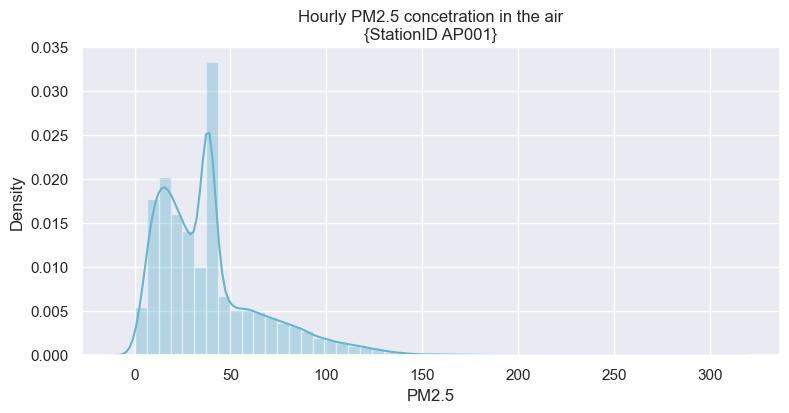

In [14]:
o.figure(figsize=(9,4))
seab.distplot(df['PM2.5'],bins=50,color='c')
o.title('Hourly PM2.5 concetration in the air\n{StationID AP001}',fontsize=12)
o.show()

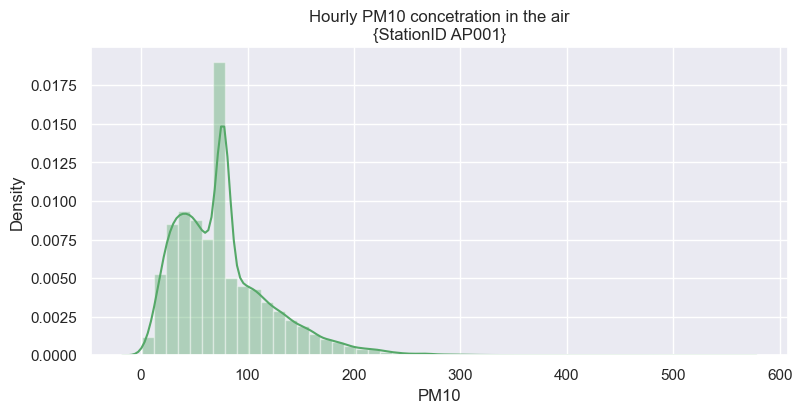

In [15]:
o.figure(figsize=(9,4))
seab.distplot(df['PM10'],bins=50,color='g')
o.title('Hourly PM10 concetration in the air\n{StationID AP001}',fontsize=12)
o.show()

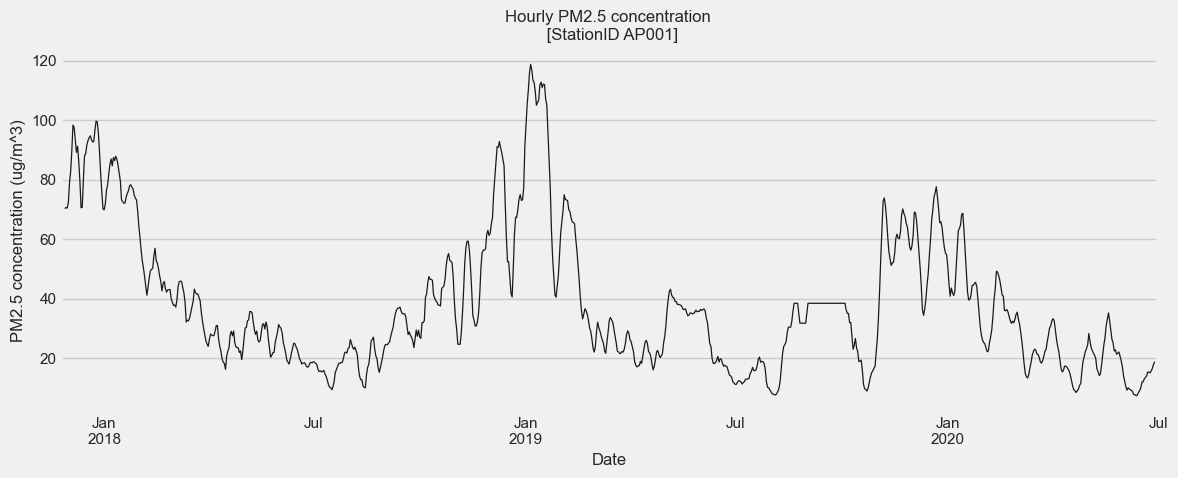

In [16]:
daily_data = df[['Datetime','PM2.5']]
daily_data = daily_data.set_index('Datetime')
daily_data = daily_data.resample('D').median()
decomposition = seasonal_decompose(daily_data,model='addictive')

with o.style.context('fivethirtyeight'):
    decomposition.trend.plot(figsize=(12,5),style='k-',linewidth=.9,legend=False)
    o.xlabel('Date',fontsize=12)
    
    o.ylabel('PM2.5 concentration (ug/m^3)',fontsize=12)
    o.title('Hourly PM2.5 concentration \n [StationID AP001]',fontsize=12)
    o.grid(axis='x')
    o.tight_layout()
    o.show()

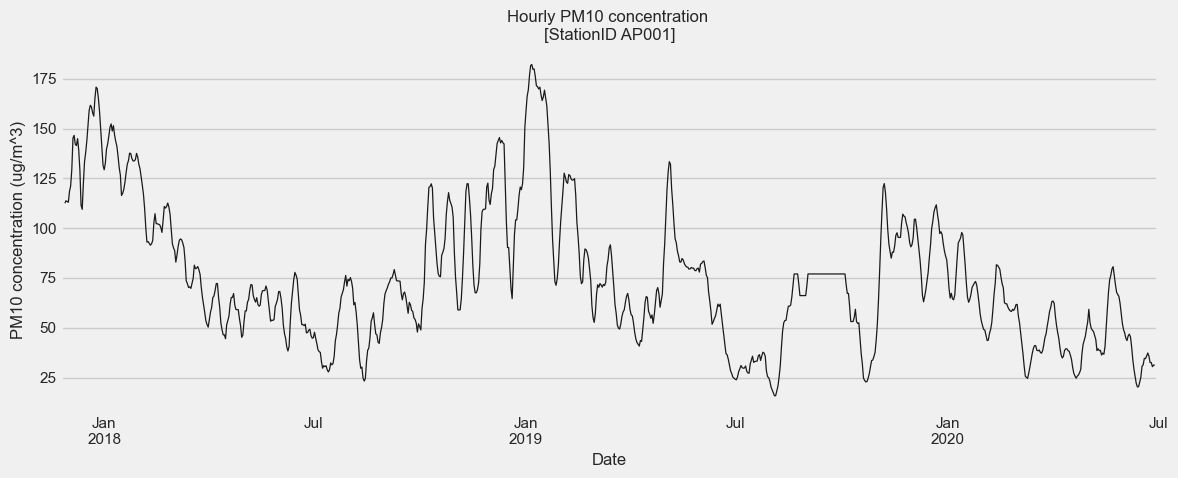

In [17]:
daily_data = df[['Datetime','PM10']]
daily_data = daily_data.set_index('Datetime')
daily_data = daily_data.resample('D').median()
decomposition = seasonal_decompose(daily_data,model='addictive')

with o.style.context('fivethirtyeight'):
    decomposition.trend.plot(figsize=(12,5),style='k-',linewidth=.9,legend=False)
    o.xlabel('Date',fontsize=12)
    o.ylabel('PM10 concentration (ug/m^3)',fontsize=12)
    o.title('Hourly PM10 concentration \n[StationID AP001]',fontsize=12)
    o.grid(axis='x')
    o.tight_layout()
    o.show()

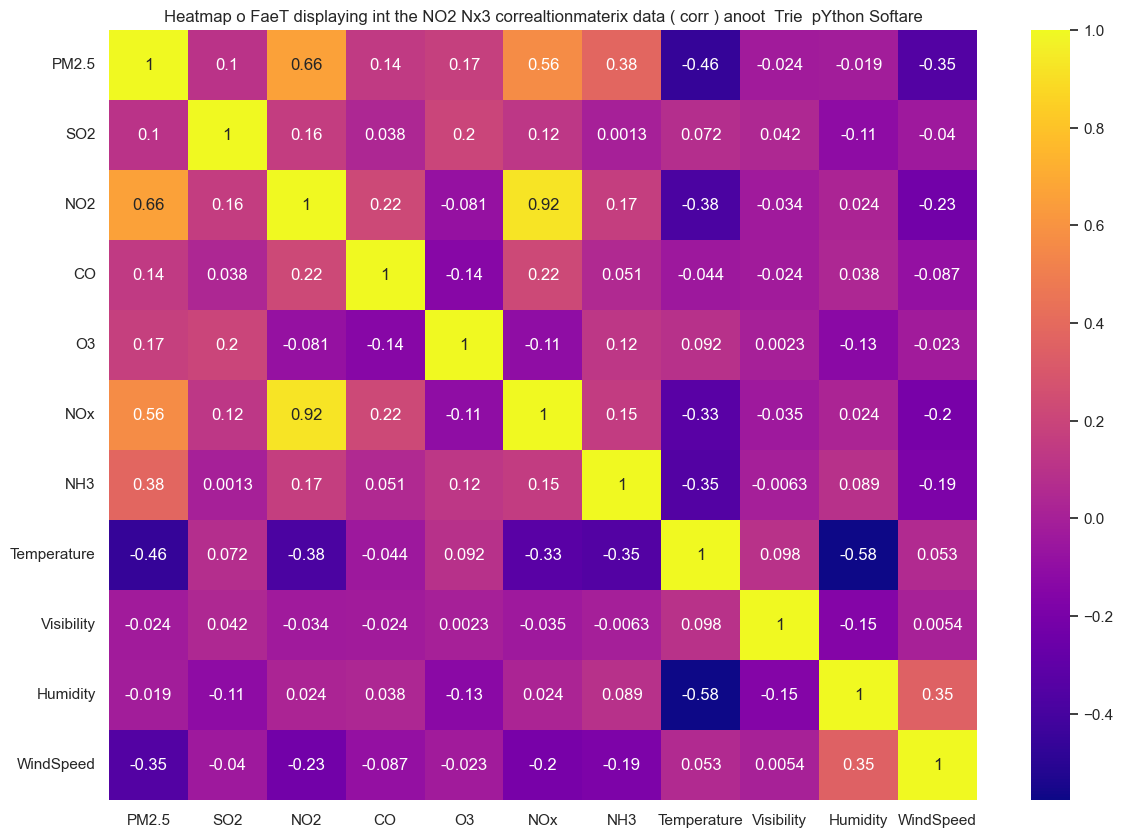

<module 'matplotlib.pyplot' from 'c:\\Users\\paras\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [18]:
o.figure(figsize=(14,10))
correlation_data = df[['PM2.5', 'SO2', 'NO2',
                         'CO', 'O3', 'NOx', 'NH3',
                         'Temperature', 'Visibility', 'Humidity','WindSpeed']]
seab.heatmap(correlation_data.corr(),cmap=o.cm.plasma,annot=True)
o.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
o.title('Heatmap O fear ')
o.title('Heatmap o FaeT displaying int the NO2 Nx3 correaltionmaterix data ( corr ) anoot  Trie  pYthon Softare')
o.show()
o

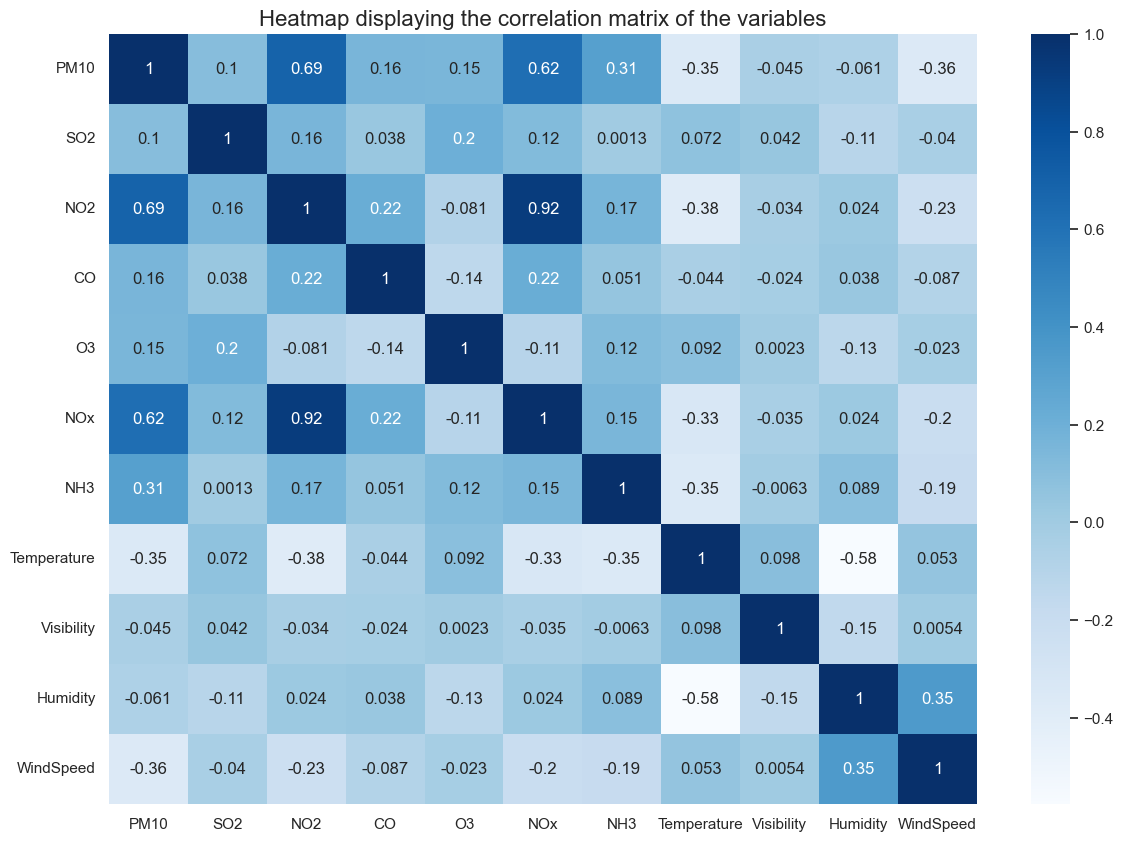

In [20]:
from multiprocessing.spawn import import_main_path


o.figure(figsize=(14,10))
correlation_data = df[['PM10', 'SO2', 'NO2',
                         'CO', 'O3', 'NOx', 'NH3',
                         'Temperature', 'Visibility', 'Humidity','WindSpeed']]
seab.heatmap(correlation_data.corr(),cmap=o.cm.Blues,annot=True)
o.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
o.show()  

In [22]:
cols_to_drop = ['StationId','Datetime','NO','Benzene','Toluene','Xylene','AQI','totalSnow_cm','maxtempC','uvIndex.1','mintempC','sunHour','uvIndex','uvIndex','moon_illumination','moonrise','moonset','sunrise' ,'sunset','DewPointC' ,'FeelsLikeC','HeatIndexC' ,'WindChillC','WindGustKmph','cloudcover','Precip','Pressure','WindDirect']
newdata = df.drop(cols_to_drop,axis=1)  #removes columns specified above
ensemble_df = df.drop(cols_to_drop,axis=1)  
X = ensemble_df.drop('PM2.5',axis=1)
y = ensemble_df['PM2.5']

In [23]:
newdata.head(7)

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,Humidity,Temperature,Visibility,WindSpeed
0,73.00,102.00,14.30,7.90,11.50,0.3,11.80,121.50,54,15,10,8
1,81.00,123.00,24.85,13.88,10.28,0.1,11.62,83.80,55,15,10,8
2,82.50,122.75,21.82,12.65,10.18,0.1,12.70,87.25,55,15,10,8
3,77.50,112.50,23.50,12.90,8.90,0.1,11.58,76.45,56,14,10,8
4,77.00,112.50,23.58,13.60,8.75,0.1,11.10,101.93,51,17,10,8
5,80.75,122.00,19.20,11.08,9.30,0.1,12.58,107.77,46,19,10,8
6,83.00,137.00,26.03,15.62,7.73,0.1,12.75,93.57,41,22,10,8


In [24]:
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],index=cons_data.columns)
series_before

const          194.733632
PM2.5            5.589014
PM10             5.076313
NO2              8.910992
NOx              7.040368
NH3              1.285831
CO               1.093364
SO2              1.106195
O3               1.243010
Humidity         2.127847
Temperature      2.559592
Visibility       1.034713
WindSpeed        1.394178
dtype: float64

In [25]:
newdata.dtypes


PM2.5          float64
PM10           float64
NO2            float64
NOx            float64
NH3            float64
CO             float64
SO2            float64
O3             float64
Humidity         int64
Temperature      int64
Visibility       int64
WindSpeed        int64
dtype: object

In [26]:
newdata.count

<bound method DataFrame.count of        PM2.5    PM10    NO2    NOx    NH3    CO    SO2      O3  Humidity  \
0      73.00  102.00  14.30   7.90  11.50  0.30  11.80  121.50        54   
1      81.00  123.00  24.85  13.88  10.28  0.10  11.62   83.80        55   
2      82.50  122.75  21.82  12.65  10.18  0.10  12.70   87.25        55   
3      77.50  112.50  23.50  12.90   8.90  0.10  11.58   76.45        56   
4      77.00  112.50  23.58  13.60   8.75  0.10  11.10  101.93        51   
...      ...     ...    ...    ...    ...   ...    ...     ...       ...   
22771  28.75   39.00  14.05   8.68   9.40  0.76  11.95   39.98        79   
22772  24.50   46.50  18.85  11.70  10.25  0.74  12.85   34.98        80   
22773  30.25   49.00  17.10  10.20   9.82  0.71  11.78   29.32        80   
22774  24.25   40.75  10.82   6.78   8.75  0.61  11.12   31.77        81   
22775  22.00   34.00   9.68   6.40   8.45  0.59  10.88   29.15        82   

       Temperature  Visibility  WindSpeed  
0         

In [27]:
newdata = newdata.drop('NOx',axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],index=cons_data2.columns)
series_after

const          194.644496
PM2.5            5.461839
PM10             5.041896
NO2              2.317122
NH3              1.278453
CO               1.092605
SO2              1.102275
O3               1.241772
Humidity         2.127046
Temperature      2.554499
Visibility       1.034694
WindSpeed        1.394167
dtype: float64

In [28]:
newdata['PM2.5'] = np.log(newdata['PM2.5'])

X = newdata.drop('PM2.5',axis=1)
y = newdata['PM2.5']


X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
X_scaled.head()

,PM10,NO2,NH3,CO,SO2,O3,Humidity,Temperature,Visibility,WindSpeed
0,0.541878,-0.357942,-0.095320,-0.661712,-0.194806,3.317579,0.440378,-2.383201,-0.033375,-0.750759
1,0.997199,0.136441,-0.294155,-1.076938,-0.210075,1.817138,0.491214,-2.383201,-0.033375,-0.750759
2,0.991779,-0.005547,-0.310453,-1.076938,-0.118463,1.954447,0.491214,-2.383201,-0.033375,-0.750759
3,0.769538,0.073179,-0.519066,-1.076938,-0.213468,1.524612,0.542050,-2.566985,-0.033375,-0.750759
4,0.769538,0.076928,-0.543513,-1.076938,-0.254185,2.538703,0.287869,-2.015634,-0.033375,-0.750759


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=0)
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)


LinearRegression()

In [30]:
print('Training Data score: {}'.format(lin_model.score(X_train,y_train)))
print("------------------------------------")
print('Test data score: {}'.format(lin_model.score(X_test,y_test)))

Training Data score: 0.7015762344660359
------------------------------------
Test data score: 0.7045173013706513


In [31]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('MSE [Mean Squared Error]: {}\n'.format(mse))
print('Overall Model Accuracy: {}'.format(accuracy))

MSE [Mean Squared Error]: 0.18161525596582087

Overall Model Accuracy: 0.7045173013706513


In [32]:
#Decision Tree
ensemble_data = df.drop(cols_to_drop,axis=1)

X = ensemble_data.drop('PM2.5',axis=1)
y = ensemble_data['PM2.5']


In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [35]:
decision_tree = DecisionTreeRegressor(
    max_depth=5,
    max_features=None,  # Use all features
    min_samples_split=3,
    min_samples_leaf=2
)


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define and fit the model
decision_tree = DecisionTreeRegressor(
    max_depth=5,
    max_features='sqrt',  # Use a valid option
    min_samples_split=3,
    min_samples_leaf=2
)
decision_tree.fit(xtrain, ytrain)  # Fit the model

# Evaluate the model
print('Training Data score: {}\n'.format(decision_tree.score(xtrain, ytrain)))
print('Test Data score: {}\n'.format(decision_tree.score(xtest, ytest)))

# Predict and compute metrics
tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest, tree_pred)
tree_mae = mean_absolute_error(ytest, tree_pred)
tree_accuracy = r2_score(ytest, tree_pred)

print('Mean Absolute Error: {}\n'.format(tree_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(tree_mse)))
print('Overall Model Accuracy: {}'.format(tree_accuracy))



Training Data score: 0.6703715569873687

Test Data score: 0.6631172432824194

Mean Absolute Error: 11.579286811274706

RMSE [Root Mean Squared Error]: 16.065834355198277

Overall Model Accuracy: 0.6631172432824194


In [38]:
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

In [39]:
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [40]:
print('Training Data Score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test Data Score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best Parameters are as follows -')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)
tree_mae = mean_absolute_error(ytest,tree_pred)

print('Mean Absolute Error: {}\n'.format(tree_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall Model Accuracy: {}'.format(tree_search_accuracy))

Training Data Score: 0.79363504447082

Test Data Score: 0.7731050988052002

Best Parameters are as follows -


{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 9,
 'min_samples_split': 2}

Mean Absolute Error: 11.579286811274706

RMSE [Root Mean Squared Error]: 13.184882444897093

Overall Model Accuracy: 0.7731050988052002


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
forest = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    max_features='sqrt',  # Choose a valid option
    min_samples_split=7,
    min_samples_leaf=3
)

# Fit the model
forest.fit(xtrain, ytrain)

# Evaluate
train_score = forest.score(xtrain, ytrain)
test_score = forest.score(xtest, ytest)

print(f"Training Data Score: {train_score}")
print(f"Test Data Score: {test_score}")


Training Data Score: 0.8767009695364123
Test Data Score: 0.8658641625438451


In [43]:
print('Training Data score: {}\n'.format(forest.score(xtrain,ytrain)))
print('Test Data score: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)
forest_mae = mean_absolute_error(ytest,forest_pred)

print('Mean Absolute Error: {}\n'.format(forest_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(forest_mse)))
print('Overall Model Accuracy: {}'.format(forest_accuracy))

Training Data score: 0.8767009695364123

Test Data score: 0.8658641625438451

Mean Absolute Error: 6.916473171280909

RMSE [Root Mean Squared Error]: 10.137626962436252

Overall Model Accuracy: 0.8658641625438451


In [44]:
params['n_estimators'] = [100,200,300,400,500]
random_forest = RandomForestRegressor()
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [45]:
print('Training Data score: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Test Data score: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters are as follows -')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)
forest_mae = mean_absolute_error(ytest,forest_pred)

print('Mean Absolute Error: {}\n'.format(forest_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall Model Accuracy: {}'.format(forest_search_accuracy))


Training Data score: 0.877158316221497

Test Data score: 0.865589344662439

Best parameters are as follows -


{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 7}

Mean Absolute Error: 6.916473171280909

RMSE [Root Mean Squared Error]: 10.148006648004616

Overall Model Accuracy: 0.865589344662439


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
grad_boost = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=7,
    max_features='sqrt',  # Choose a valid option
    min_samples_split=7,
    min_samples_leaf=3,
    learning_rate=0.1
)

# Fit the model
grad_boost.fit(xtrain, ytrain)

# Evaluate
train_score = grad_boost.score(xtrain, ytrain)
test_score = grad_boost.score(xtest, ytest)

print(f"Training Data Score: {train_score}")
print(f"Test Data Score: {test_score}")


Training Data Score: 0.952100370270015
Test Data Score: 0.9066853000549816


In [48]:
print('Training Data score: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Test Data score: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)
gboost_mae = mean_absolute_error(ytest,gboost_pred)

print('Mean Absolute Error: {}\n'.format(gboost_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall Model Accuracy: {}'.format(gboost_accuracy))

Training Data score: 0.952100370270015

Test Data score: 0.9066853000549816

Mean Absolute Error: 5.528729306704203

RMSE [Root Mean Squared Error]: 8.455492832528677

Overall Model Accuracy: 0.9066853000549816


In [49]:
params['learning_rate'] = np.linspace(0.1,1,10)
gradient_boosting = GradientBoostingRegressor()
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)

In [50]:
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [51]:
print('Training Data score: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Test Data score: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters are as follows -')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)
gboost_mae = mean_absolute_error(ytest,gboost_pred)

print('Mean Absolute Error: {}\n'.format(gboost_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall Model Accuracy: {}'.format(gboost_search_accuracy))



Training Data score: 0.9751212011873097

Test Data score: 0.9054534651529376

Best parameters are as follows -


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 5,
 'learning_rate': 0.30000000000000004}

Mean Absolute Error: 5.528729306704203

RMSE [Root Mean Squared Error]: 8.51111976976531

Overall Model Accuracy: 0.9054534651529376


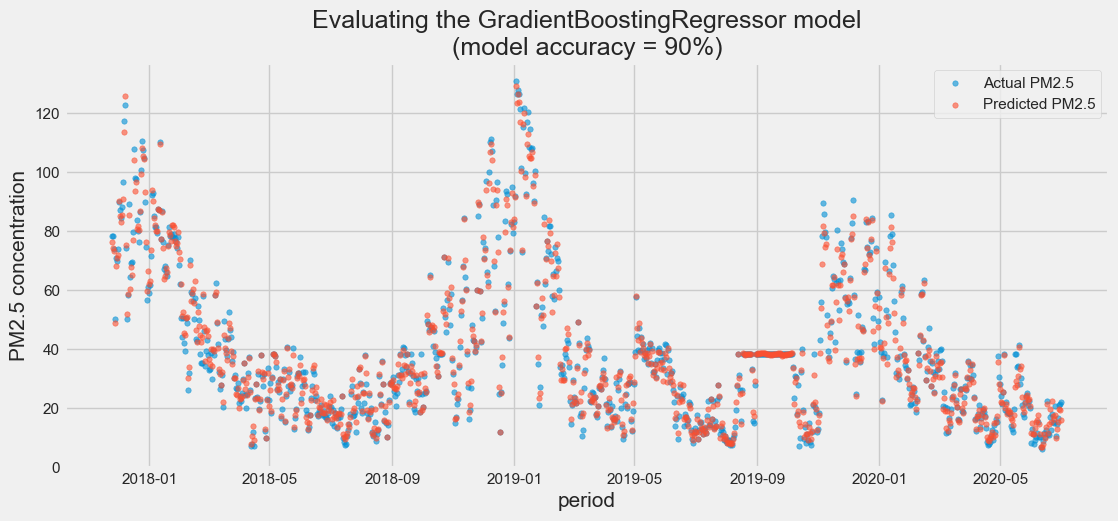

In [52]:
compare_data = pd.DataFrame({'dates':df['Datetime'],
                            'Actual PM2.5':y,
                            'Predicted PM2.5':gboost_search.predict(X.values)})

compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM2.5'] = np.round(compare_data['Predicted PM2.5'],1)


compare_data = compare_data.resample('D').mean()

with o.style.context('fivethirtyeight'):
    o.figure(figsize=(12,5))
    o.scatter(compare_data.index,compare_data['Actual PM2.5'],s=15,label='Actual PM2.5',
               alpha=.6)
    o.scatter(compare_data.index,compare_data['Predicted PM2.5'],s=15,label='Predicted PM2.5',
               alpha=.6)
    o.legend()
    o.title('Evaluating the GradientBoostingRegressor model\n(model accuracy = 90%)',
             fontsize=18)
    o.xlabel('period',fontsize=15)
    o.ylabel('PM2.5 concentration',fontsize=15)
    o.show()

In [53]:
ensemble_data = df.drop(cols_to_drop,axis=1)

a = ensemble_data.drop('PM10',axis=1)
b = ensemble_data['PM10']


In [54]:
atrain,atest,btrain,btest = train_test_split(a,b,test_size=.2)

In [56]:
decision_tree = DecisionTreeRegressor(
    max_depth=5,
    max_features=None,  # Use all features
    min_samples_split=3,
    min_samples_leaf=2
)
decision_tree.fit(atrain, btrain)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=3)

In [57]:
print('Training Data score: {}\n'.format(decision_tree.score(atrain,btrain)))
print('Test Data score: {}\n'.format(decision_tree.score(atest,btest)))

tree_pred = decision_tree.predict(atest)
tree_mse = mean_squared_error(btest,tree_pred)
tree_accuracy = r2_score(btest,tree_pred)
tree_mae = mean_absolute_error(btest,tree_pred)

print('Mean Absolute Error: {}\n'.format(tree_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(tree_mse)))
print('Overall Model Accuracy: {}'.format(tree_accuracy))

Training Data score: 0.8141207206813859

Test Data score: 0.8067358555950959

Mean Absolute Error: 12.571719202609227

RMSE [Root Mean Squared Error]: 20.015319924707075

Overall Model Accuracy: 0.8067358555950959


In [58]:
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

In [59]:
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(atrain,btrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [60]:
print('Training Data score: {}\n'.format(tree_search.score(atrain,btrain)))
print('Test Data score: {}\n'.format(tree_search.score(atest,btest)))
print('Best parameters are as follows -')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(atest)
tree_search_mse = mean_squared_error(btest,tree_search_pred)
tree_search_accuracy = r2_score(btest,tree_search_pred)
tree_mae = mean_absolute_error(btest,tree_pred)

print('Mean Absolute Error: {}\n'.format(tree_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall Model Accuracy: {}'.format(tree_search_accuracy))
#ppratek parashar praah pfa fsplay ( ao aia  PA(a na I{aj akn acti
# }))

Training Data score: 0.7832130065262168

Test Data score: 0.7656570506756146

Best parameters are as follows -


{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 9,
 'min_samples_split': 3}

Mean Absolute Error: 12.571719202609227

RMSE [Root Mean Squared Error]: 22.040063313630675

Overall Model Accuracy: 0.7656570506756146


In [62]:
forest = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    max_features=None,  # Use all features
    min_samples_split=7,
    min_samples_leaf=3
)
forest.fit(atrain, btrain)



RandomForestRegressor(max_depth=7, max_features=None, min_samples_leaf=3,
                      min_samples_split=7)

In [63]:
print('Training Data score: {}\n'.format(forest.score(atrain,btrain)))
print('Test Data score: {}\n'.format(forest.score(atest,btest)))

forest_pred = forest.predict(atest)
forest_mse = mean_squared_error(btest,forest_pred)
forest_accuracy = r2_score(btest,forest_pred)
forest_mae = mean_absolute_error(btest,forest_pred)

print('Mean Absolute Error: {}\n'.format(forest_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(forest_mse)))
print('Overall Model Accuracy: {}'.format(forest_accuracy))

Training Data score: 0.8682076143061548

Test Data score: 0.8391638689450519

Mean Absolute Error: 11.202648429366329

RMSE [Root Mean Squared Error]: 18.259071985209935

Overall Model Accuracy: 0.8391638689450519


In [64]:
params['n_estimators'] = [100,200,300,400,500]
random_forest = RandomForestRegressor()
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(atrain,btrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [65]:
print('Training Data score: {}\n'.format(forest_search.score(atrain,btrain)))
print('Test Data score: {}\n'.format(forest_search.score(atest,btest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(atest)
forest_search_mse = mean_squared_error(btest,forest_search_pred)
forest_search_accuracy = r2_score(btest,forest_search_pred)
forest_mae = mean_absolute_error(btest,forest_pred)

print('Mean Absolute Error: {}\n'.format(forest_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall Model Accuracy: {}'.format(forest_search_accuracy))

Training Data score: 0.8231401580343728

Test Data score: 0.810103901809621

Best parameters found:


{'n_estimators': 500,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 6}

Mean Absolute Error: 11.202648429366329

RMSE [Root Mean Squared Error]: 19.840148238238204

Overall Model Accuracy: 0.810103901809621


In [67]:
grad_boost = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=7,
    max_features=None,  # Use all features
    min_samples_split=7,
    min_samples_leaf=3,
    learning_rate=0.1
)
grad_boost.fit(atrain, btrain)


GradientBoostingRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [68]:
print('Training Data score: {}\n'.format(grad_boost.score(atrain,btrain)))
print('Test Data score: {}\n'.format(grad_boost.score(atest,btest)))

gboost_pred = grad_boost.predict(atest)
gboost_mse = mean_squared_error(btest,gboost_pred)
gboost_accuracy = r2_score(btest,gboost_pred)
gboost_mae = mean_absolute_error(btest,gboost_pred)

print('Mean Absolute Error: {}\n'.format(gboost_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall Model Accuracy: {}'.format(gboost_accuracy))

Training Data score: 0.9380502448116738

Test Data score: 0.8705829619395142

Mean Absolute Error: 9.928392445604063

RMSE [Root Mean Squared Error]: 16.378820373999734

Overall Model Accuracy: 0.8705829619395142


In [69]:
params['learning_rate'] = np.linspace(0.1,1,10)
gradient_boosting = GradientBoostingRegressor()
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(atrain,btrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [70]:
print('Training Data score: {}\n'.format(gboost_search.score(atrain,btrain)))
print('Test Data score: {}\n'.format(gboost_search.score(atest,btest)))
print('Best parameters are as follows -')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(atest)
gboost_search_mse = mean_squared_error(btest,gboost_search_pred)
gboost_search_accuracy = r2_score(btest,gboost_search_pred)
gboost_mae = mean_absolute_error(btest,gboost_pred)

print('Mean Absolute Error: {}\n'.format(gboost_mae))
print('RMSE [Root Mean Squared Error]: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall Model Accuracy: {}'.format(gboost_search_accuracy))

Training Data score: 0.9917667263782325

Test Data score: 0.8626489477170198

Best parameters are as follows -


{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'learning_rate': 0.30000000000000004}

Mean Absolute Error: 9.928392445604063

RMSE [Root Mean Squared Error]: 16.8734110943918

Overall Model Accuracy: 0.8626489477170198


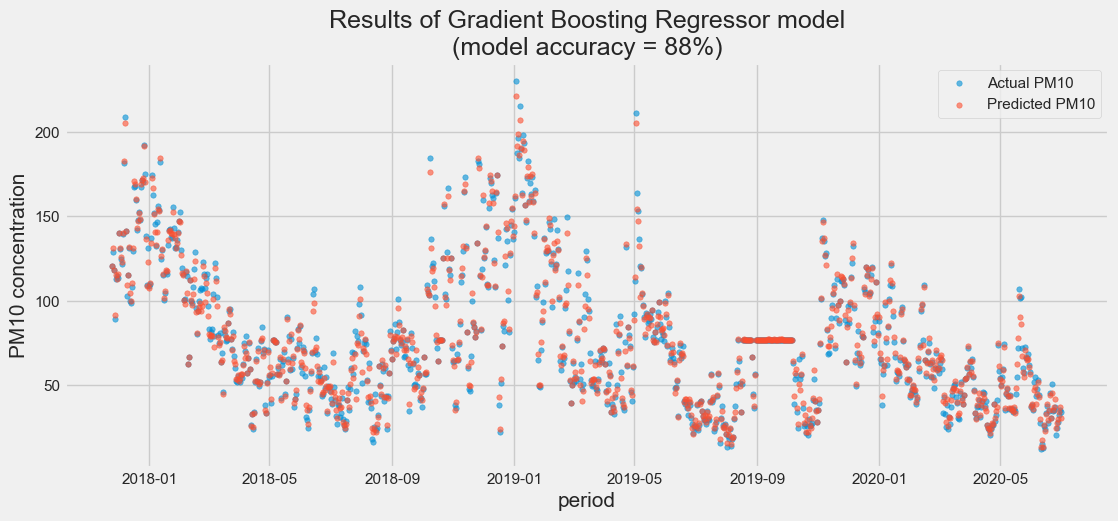

In [71]:
compare_data = pd.DataFrame({'dates':df['Datetime'],
                            'Actual PM10':b,
                            'Predicted PM10':gboost_search.predict(a.values)})

compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM10'] = np.round(compare_data['Predicted PM10'],1)


compare_data = compare_data.resample('D').mean()

with o.style.context('fivethirtyeight'):
    o.figure(figsize=(12,5))
    o.scatter(compare_data.index,compare_data['Actual PM10'],s=15,label='Actual PM10',
               alpha=.6)
    o.scatter(compare_data.index,compare_data['Predicted PM10'],s=15,label='Predicted PM10',
               alpha=.6)
    o.legend()
    o.title('Results of Gradient Boosting Regressor model\n(model accuracy = 88%)',fontsize=18)
    o.xlabel('period',fontsize=15)
    o.ylabel('PM10 concentration',fontsize=15)
    o.show()

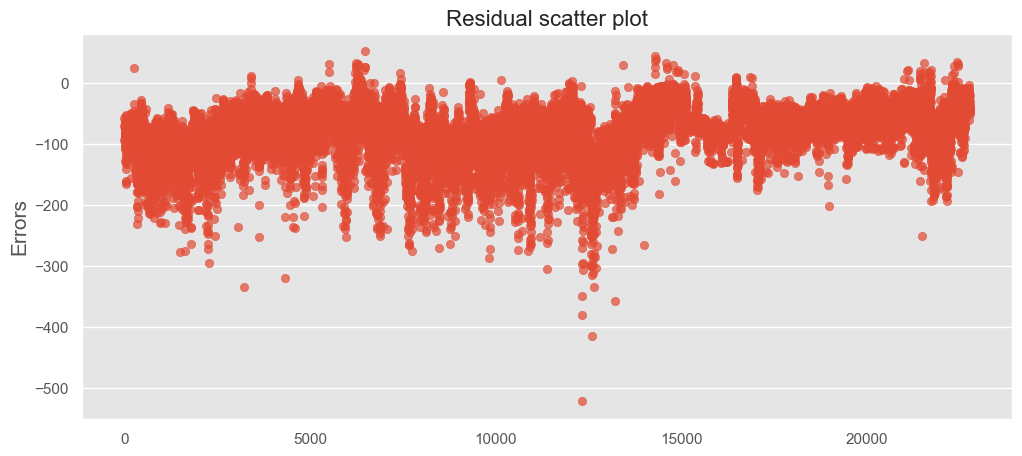

In [72]:
compare_data = pd.DataFrame({'dates':df['Datetime'],
                            'Actual PM2.5':y,
                            'Predicted PM2.5':gboost_search.predict(X.values)})
compare_data['Residuals'] = compare_data['Actual PM2.5'] - compare_data['Predicted PM2.5']

with o.style.context('ggplot'):
    o.figure(figsize=(12,5))
    o.scatter(compare_data.index,compare_data.Residuals,alpha=0.7)
    o.title('Residual scatter plot',fontsize=16)
    o.ylabel('Errors',fontsize=15)
    o.grid(axis='x')
    o.show()


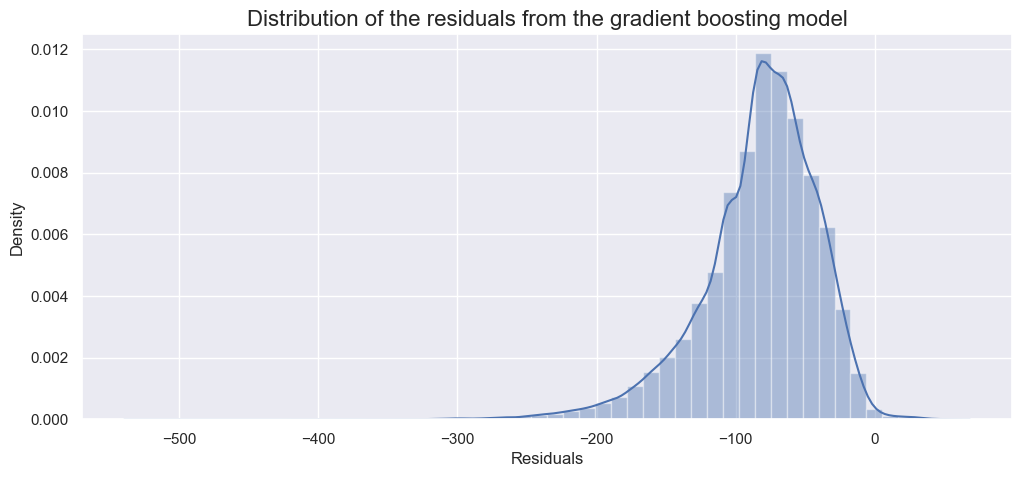

In [73]:
o.figure(figsize=(12,5))
seab.distplot(compare_data.Residuals,bins=50)
o.title('Distribution of the residuals from the gradient boosting model',
         fontsize=16)
o.show()

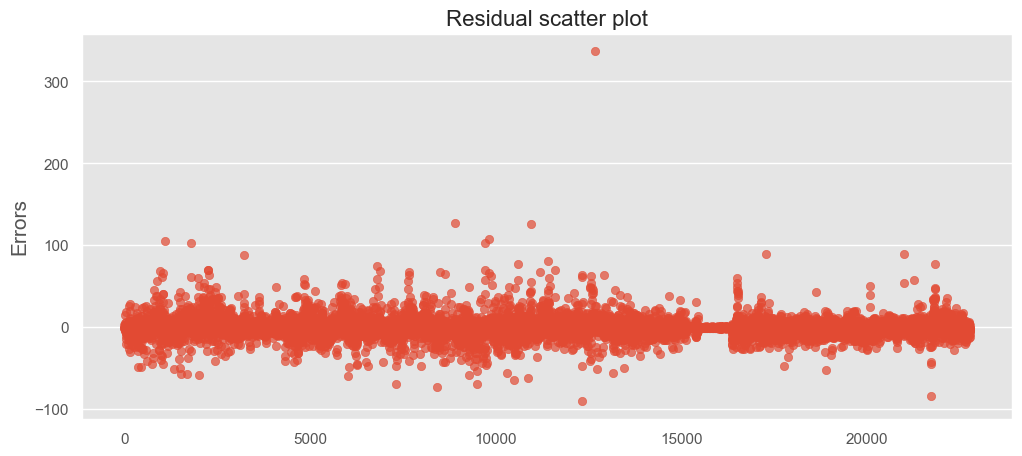

In [74]:
compare_data = pd.DataFrame({'dates':df['Datetime'],
                            'Actual PM10':b,
                            'Predicted PM10':gboost_search.predict(a.values)})
compare_data['Residuals'] = compare_data['Actual PM10'] - compare_data['Predicted PM10']

with o.style.context('ggplot'):
    o.figure(figsize=(12,5))
    o.scatter(compare_data.index,compare_data.Residuals,alpha=0.7)
    o.title('Residual scatter plot',fontsize=16)
    o.ylabel('Errors',fontsize=15)
    o.grid(axis='x')
    o.show()

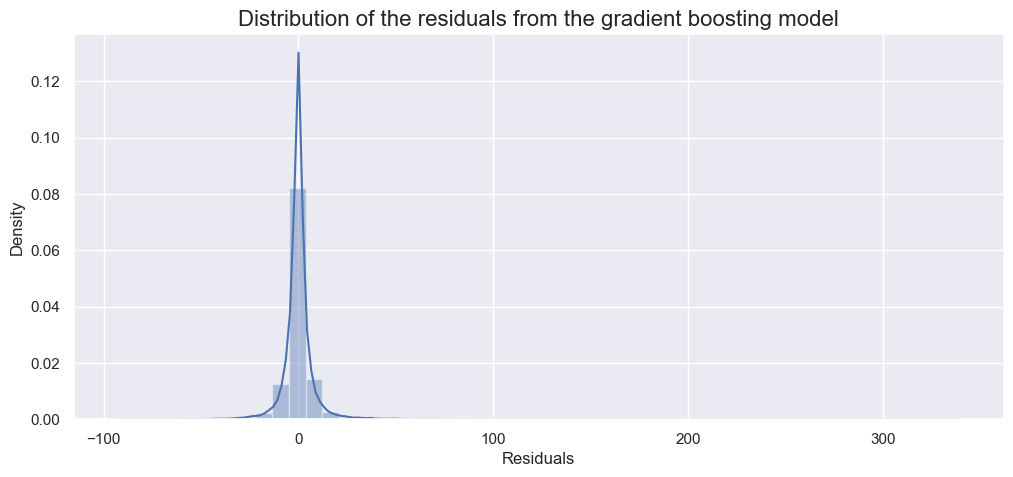

In [75]:
o.figure(figsize=(12,5))
seab.distplot(compare_data.Residuals,bins=50)
o.title('Distribution of the residuals from the gradient boosting model',
         fontsize=16)
o.show()

In [76]:
newdata.describe()

,PM2.5,PM10,NO2,NH3,CO,SO2,O3,Humidity,Temperature,Visibility,WindSpeed
count,22776.000000,22776.000000,22776.000000,22776.000000,22776.000000,22776.000000,22776.000000,22776.000000,22776.000000,22776.000000,22776.000000
mean,3.384328,77.007920,21.938381,12.084864,0.618724,14.096526,38.142658,45.337329,27.967422,10.047945,12.831138
std,0.784808,46.122278,21.340178,6.135896,0.481677,11.789017,25.126509,19.671439,5.441298,1.436572,6.435148
min,-1.386294,1.000000,0.100000,0.100000,0.000000,0.030000,0.600000,4.000000,12.000000,0.000000,0.000000
25%,2.890372,43.500000,9.030000,7.995000,0.400000,8.500000,21.270000,29.000000,24.000000,10.000000,8.000000
50%,3.569533,76.000000,17.050000,12.084864,0.618724,13.350000,37.250000,45.000000,28.000000,10.000000,11.000000
75%,3.860730,96.500000,22.070000,15.300000,0.690000,15.350000,45.800000,61.000000,31.000000,10.000000,16.000000
max,5.732532,559.250000,198.050000,197.970000,9.920000,195.000000,199.920000,100.000000,46.000000,20.000000,37.000000


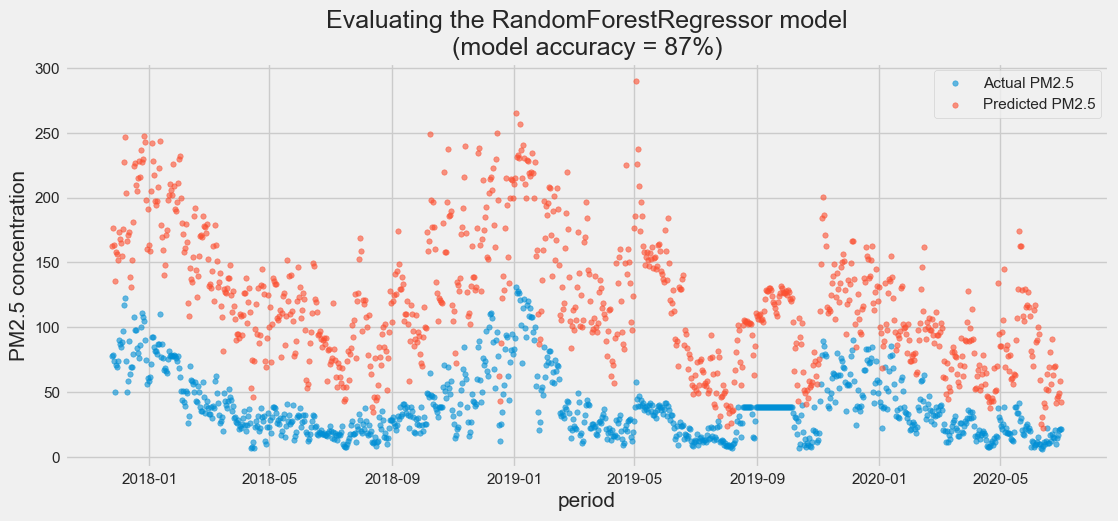

In [77]:
compare_data = pd.DataFrame({'dates':df['Datetime'],
                            'Actual PM2.5':y,
                            'Predicted PM2.5':gboost_search.predict(X.values)})

compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM2.5'] = np.round(compare_data['Predicted PM2.5'],1)

# let's plot the daily averages of the Actual PM10 and the predicted PM2.5 concentration.
compare_data = compare_data.resample('D').mean()

with o.style.context('fivethirtyeight'):
    o.figure(figsize=(12,5))
    o.scatter(compare_data.index,compare_data['Actual PM2.5'],s=15,label='Actual PM2.5',
               alpha=.6)
    o.scatter(compare_data.index,compare_data['Predicted PM2.5'],s=15,label='Predicted PM2.5',
               alpha=.6)
    o.legend()
    o.title('Evaluating the RandomForestRegressor model\n(model accuracy = 87%)',
             fontsize=18)
    o.xlabel('period',fontsize=15)
    o.ylabel('PM2.5 concentration',fontsize=15)
    o.show()